# NetworkX, Soft landing

Lets run some imports

In [1]:
# %matplotlib notebook

# Base libraries
import pandas as pd
import networkx as nx

# Community Algorithms
import networkx.algorithms.community as nxcom
from networkx.algorithms import bipartite

# Plotting
from matplotlib import pyplot as plt

# get reproducible results
import random
from numpy import random as nprand
random.seed(123)
nprand.seed(123)

# Graphs creation
## 1. Create a Graph object
## 2. Start adding nodes

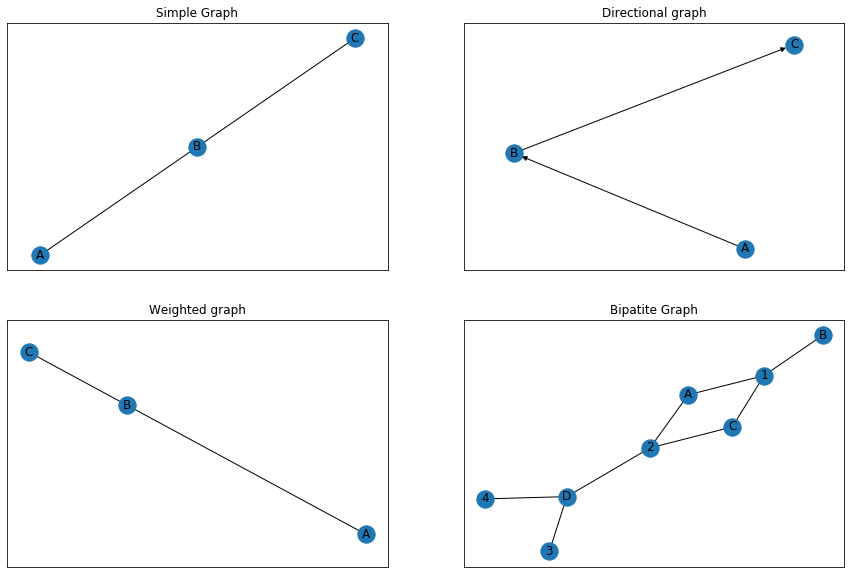

In [2]:
# Simple graph
simple_G = nx.Graph()
simple_G.add_edge('A','B')
simple_G.add_edge('B','C')

# Directional graph
digraph_G = nx.DiGraph()
digraph_G.add_edge('A','B')
digraph_G.add_edge('B','C')

# Weighted graph
weight_G = nx.Graph()
weight_G.add_edge('A','B', weight=6)
weight_G.add_edge('B','C', weight=60)

# Bipatite Graph
bipatite_G = nx.Graph() # no seperate class for bipartite

# Declare  nodes
bipatite_G.add_nodes_from(['A', 'B', 'C', 'D'], bipartite = 0) 
bipatite_G.add_nodes_from([1, 2, 3, 4], bipartite = 1)

# Build egdes
bipatite_G.add_edges_from([('A', 1),
                  ('A', 2),
                  ('B', 1),
                  ('C', 1),
                  ('C', 2),
                  ('D', 4),
                  ('D', 3),
                  ('D', 2)])

# Draw the graph's
G = nx.grid_2d_graph(2,2)  #1x3 grid

simple_pos=nx.spring_layout(simple_G)
digraph_pos=nx.spring_layout(digraph_G)
weighted_pos=nx.spring_layout(weight_G)
bipartite_pos=nx.spring_layout(bipatite_G)

plt.rcParams.update({'figure.figsize': (15, 10)})

plt.subplot(221)
nx.draw_networkx(simple_G, simple_pos)
plt.title('Simple Graph')

plt.subplot(222)
nx.draw_networkx(digraph_G,digraph_pos)
plt.title('Directional graph')

plt.subplot(223)
nx.draw_networkx(weight_G,weighted_pos)
plt.title('Weighted graph')

plt.subplot(224)
nx.draw_networkx(bipatite_G,bipartite_pos)
plt.title('Bipatite Graph');

In [3]:
# We can overload attributes to an edge

# Append / Modify / Access to Node or attributes using python Dictionary convention

G = nx.Graph()
G.add_edge('A','B', stam=6, whatever = 'sababa')

print("G['B'] :", G['B'])
print("G['A']['B'] :",G['A']['B'])

# Notes
# -----
# Adding an edge that already exists updates the edge data.

# Many NetworkX algorithms designed for weighted graphs use
# an edge attribute (by default `weight`) to hold a numerical value.

G['B'] : {'A': {'stam': 6, 'whatever': 'sababa'}}
G['A']['B'] : {'stam': 6, 'whatever': 'sababa'}


# Network Analyze

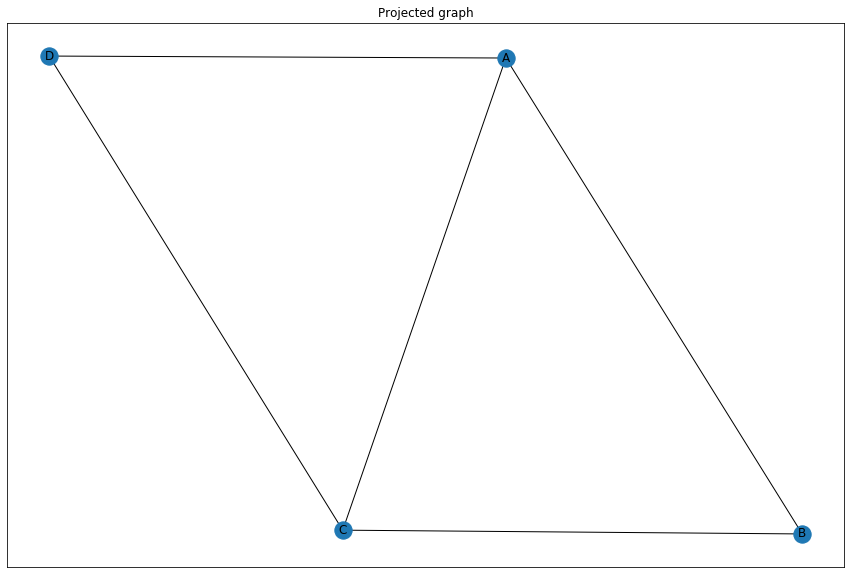

In [6]:
# Projected graph

# Select set to test for
X = set(['A', 'B', 'C','D'])
L = bipartite.projected_graph(bipatite_G, X)

# Draw the graph
nx.draw_networkx(L)
plt.title('Projected graph');

In [ ]:
# Weighted projected graph

# Select set
X = set(['A', 'B', 'C','D'])
L = bipartite.weighted_projected_graph(B, X)

# Draw the graph
nx.draw_networkx(L)
plt.title('Weighted projected graph')

L.edges(data=True)

In [ ]:
# Check for a single division of the network
# All the arches connect diffrets nodes groups

bipartite.sets(B)

# Local clustering coeffiecient

In [ ]:
# Load a network from file

G = nx.read_adjlist('adjacency_list.txt', nodetype=int)

# Draw the network
nx.draw_networkx(G)
nx.to_pandas_edgelist(G)

In [ ]:
# local clustering coefficient
# Give node V, the precentege of nodes connected to V,
# which are connected to at least one node connected to V.

print('Node 2 clustering: ', nx.clustering(G,2))
print('Average clustering: ', nx.average_clustering(G))

In [ ]:
# The avarege clustering



# network statistics

In [ ]:
# Genral info

print("General info:", nx.info(G),'\n')

# The center of the network
# Peripherial nodes

print ('Network center: ', nx.center(G),'\n')
print ('Network peripherial nodes: ', nx.periphery(G),'\n')

# Network Diameter
# Maximum distance between two nodes
print ('Network Diameter', nx.diameter(G), '\n')

# Is the network fully conncted?
print ('Is network fully connected', nx.is_connected(G), '\n')

# Network density
# Edges / (Nodes*(Nodes-1))
print ('Network density', nx.density(G), '\n')

# Want to build "Waze" app with one line?

In [ ]:
# All the paths from a to 
# For a weighted graph the calculation sums the weights between the nodes
sorted(nx.all_simple_paths(G,7,9))

In [ ]:
nx.shortest_path(G,7,9)

In [ ]:
T = nx.bfs_tree(G,7)
nx.draw_networkx(T)

# Notice the graph became directional 